# Session 26/6/2017 - machine learning

Découverte des trois problèmes de machine learning exposé dans l'article [Machine Learning - session 6](http://www.xavierdupre.fr/app/actuariat_python/helpsphinx/blog/2017/2017-06-25_plan_session6.html).

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Problème 1 : comparaison random forest, linéaire

C'est un problème de régression. On cherche à comparer une random forest avec un modèle linéaire.

* Comparaison des tests de coefficients pour un modèle linéaire
  [OLS](http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html>)
  et des [features importance](http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)
* Résultat au niveau d'une observation [treeinterpreter](https://github.com/andosa/treeinterpreter>)
* Données : [Housing](https://archive.ics.uci.edu/ml/datasets/housing>), [Forest Fire](https://archive.ics.uci.edu/ml/datasets/Forest+Fires)

### Données

In [ ]:
import pandas
df = pandas.read_csv("data/housing.data", delim_whitespace=True, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
cols = "CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRATIO B LSTAT MEDV".split()
df.columns = cols
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clr = RandomForestRegressor()
clr.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [ ]:
importances = clr.feature_importances_
importances

array([ 0.05037649,  0.00081022,  0.00589337,  0.0006357 ,  0.01317193,
        0.48711232,  0.01352733,  0.05622799,  0.0044982 ,  0.01184547,
        0.02113995,  0.01039441,  0.32436663])

On s'inspire de l'exemple [Feature importances with forests of trees](http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html).

In [ ]:
%matplotlib inline

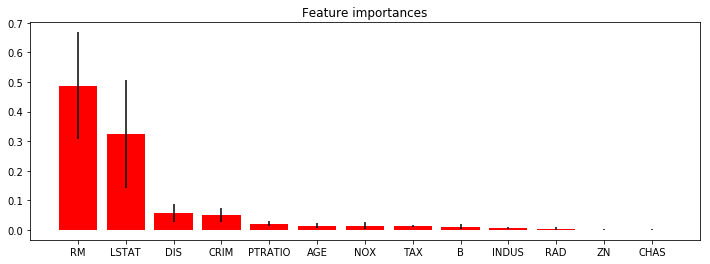

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,4))
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in clr.estimators_],
             axis=0)
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
xlabels = list(df.columns[:-1])
xlabels = [xlabels[i] for i in indices]
plt.xticks(range(X.shape[1]), xlabels)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train, clr.predict(X_train))

0.97587372510149317

In [ ]:
r2_score(y_test, clr.predict(X_test))

0.97285694938662703

### Modèle linéaire

In [ ]:
import statsmodels.api as sm

c:\Python36_x64\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [ ]:
model = sm.OLS(y_train, X_train)

In [ ]:
results = model.fit()

In [ ]:
results.params

CRIM      -0.059532
ZN         0.053210
INDUS     -0.011778
CHAS       2.935796
NOX       -4.250586
RM         5.652168
AGE        0.011217
DIS       -0.756890
RAD        0.151340
TAX       -0.009599
PTRATIO   -0.387234
B          0.015458
LSTAT     -0.402584
dtype: float64

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     558.6
Date:                Mon, 26 Jun 2017   Prob (F-statistic):          6.95e-214
Time:                        23:01:24   Log-Likelihood:                -1023.8
No. Observations:                 339   AIC:                             2074.
Df Residuals:                     326   BIC:                             2123.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0595      0.040     -1.493      0.136      -0.138       0.019
ZN             0.0532      0.019      2.828      0.005       0.016       0.090
INDUS         -0.0118      0.082     -0.144      0.886      -0.173       0.149
CHAS           2.9358      1.198      2.450      0.015       0.578       5.293
NOX           -4.2506      4.178     -1.017      0.310     -12.469       3.968
RM             5.6522      0.402     14.058      0.000       4.861       6.443
AGE            0.0112      0.018      0.624      0.533      -0.024       0.047
DIS           -0.7569      0.245     -3.088      0.002      -1.239      -0.275
RAD            0.1513      0.087      1.741      0.083      -0.020       0.322
TAX           -0.0096      0.005     -1.832      0.068      -0.020       0.001
PTRATIO       -0.3872      0.137     -2.832      0.005      -0.656      -0.118
B              0.0155      0.003      4.926      0.000       0.009       0.022
LSTAT         -0.4026      0.067     -6.039      0.000      -0.534      -0.271
==============================================================================
Omnibus:                      118.166   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              678.319
Skew:                           1.331   Prob(JB):                    5.07e-148
Kurtosis:                       9.398   Cond. No.                     8.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model = sm.OLS(y,X.drop("LSTAT", axis=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     846.6
Date:                Mon, 26 Jun 2017   Prob (F-statistic):          2.38e-320
Time:                        23:01:24   Log-Likelihood:                -1556.1
No. Observations:                 506   AIC:                             3136.
Df Residuals:                     494   BIC:                             3187.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1439      0.036     -3.990      0.000      -0.215      -0.073
ZN             0.0413      0.015      2.696      0.007       0.011       0.071
INDUS         -0.0370      0.068     -0.540      0.589      -0.172       0.098
CHAS           3.2525      0.961      3.384      0.001       1.364       5.141
NOX          -10.8653      3.422     -3.175      0.002     -17.590      -4.141
RM             7.1436      0.289     24.734      0.000       6.576       7.711
AGE           -0.0449      0.014     -3.235      0.001      -0.072      -0.018
DIS           -1.2292      0.206     -5.980      0.000      -1.633      -0.825
RAD            0.2008      0.071      2.829      0.005       0.061       0.340
TAX           -0.0100      0.004     -2.391      0.017      -0.018      -0.002
PTRATIO       -0.6575      0.112     -5.881      0.000      -0.877      -0.438
B              0.0165      0.003      5.779      0.000       0.011       0.022
==============================================================================
Omnibus:                      277.013   Durbin-Watson:                   0.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3084.310
Skew:                           2.148   Prob(JB):                         0.00
Kurtosis:                      14.307   Cond. No.                     8.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### TPOT

[TPOT](https://github.com/rhiever/tpot) est un module d'apprentissage automatique.

In [ ]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=2, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_boston_pipeline.py')

c:\Python36_x64\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Generation 1 - Current best internal CV score: 8.866376470784171


Generation 2 - Current best internal CV score: 8.866376470784171



Best pipeline: XGBRegressor(input_matrix, XGBRegressor__learning_rate=0.1, XGBRegressor__max_depth=8, XGBRegressor__min_child_weight=3, XGBRegressor__n_estimators=DEFAULT, XGBRegressor__nthread=1, XGBRegressor__subsample=0.75)
17.1420145535


Le module optimise les hyperparamètres, parfois un peu trop à en juger la mauvaise performance obtenue sur la base de test.

In [ ]:
r2_score(y_train, tpot.predict(X_train))

0.99872711294155603

In [ ]:
r2_score(y_test, tpot.predict(X_test))

0.80075945303150209

### Feature importance pour une observations

On reprend la première random forest et on utilise le module [treeinterpreter](https://github.com/andosa/treeinterpreter).

In [ ]:
clr = RandomForestRegressor()
clr.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [ ]:
from treeinterpreter import treeinterpreter as ti
prediction, bias, contributions = ti.predict(clr, X_test)

In [ ]:
for i in range(min(2, X_train.shape[0])):
    print("Instance", i)
    print("Bias (trainset mean)", bias[i])
    print("Feature contributions:")
    for c, feature in sorted(zip(contributions[i], df.columns), 
                             key=lambda x: -abs(x[0])):
        print(feature, round(c, 2))
    print( "-"*20)

Instance 0
Bias (trainset mean) 22.4966205534
Feature contributions:
RM 18.57
LSTAT 5.44
PTRATIO -3.9
B -1.59
AGE 0.68
NOX 0.2
DIS 0.1
TAX 0.06
ZN -0.02
CRIM -0.01
INDUS 0.01
CHAS 0.0
RAD 0.0
--------------------
Instance 1
Bias (trainset mean) 22.4966205534
Feature contributions:
LSTAT -4.49
RM -1.54
CRIM 1.21
AGE 1.18
NOX 1.17
CHAS 0.59
PTRATIO 0.54
INDUS 0.42
B 0.39
TAX 0.25
DIS 0.09
ZN 0.0
RAD 0.0
--------------------


## Problème 2 : série temporelle

On prend une série sur [Google Trends](https://trends.google.fr/trends/explore?q=tennis%20live), dans notre cas, c'est la requête *tennis live*. On compare une approche linéaire et une approche non linéaire.

### Approche linéaire

In [ ]:
import pandas
df = pandas.read_csv("data/multiTimeline.csv", skiprows=1)

In [ ]:
df.columns= ["Semaine", "compte"]

In [ ]:
df["SemaineDt"] = pandas.to_datetime(df.Semaine)

In [ ]:
df=df.set_index("SemaineDt")

In [ ]:
df["compte"] = df["compte"].astype(float)

In [ ]:
df.head()

,Semaine,compte
SemaineDt,,
2012-07-01,2012-07-01,70.0
2012-07-08,2012-07-08,49.0
2012-07-15,2012-07-15,18.0
2012-07-22,2012-07-22,22.0
2012-07-29,2012-07-29,88.0


In [ ]:
%matplotlib inline

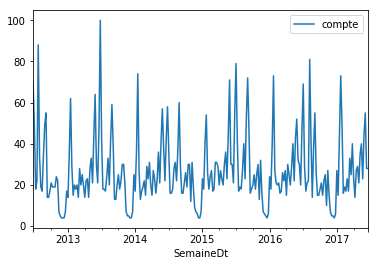

In [ ]:
df.plot()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
arma_mod = ARIMA(df["compte"].as_matrix(), order=(6 ,1, 1))
res = arma_mod.fit()
res.params

array([ 0.00418578,  0.59035778, -0.32540702,  0.23286813, -0.03300842,
        0.06434314, -0.0720402 , -0.99999983])

In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  259
Model:                 ARIMA(6, 1, 1)   Log Likelihood               -1055.581
Method:                       css-mle   S.D. of innovations             14.116
Date:                Mon, 26 Jun 2017   AIC                           2129.161
Time:                        23:02:05   BIC                           2161.173
Sample:                             1   HQIC                          2142.032
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0042      0.021      0.196      0.845      -0.038       0.046
ar.L1.D.y      0.5904      0.063      9.431      0.000       0.468       0.713
ar.L2.D.y     -0.3254      0.072     -4.507      0.000      -0.467      -0.184
ar.L3.D.y      0.2329      0.075      3.097      0.002       0.085       0.380
ar.L4.D.y     -0.0330      0.076     -0.433      0.665      -0.182       0.116
ar.L5.D.y      0.0643      0.076      0.842      0.400      -0.085       0.214
ar.L6.D.y     -0.0720      0.066     -1.096      0.274      -0.201       0.057
ma.L1.D.y     -1.0000      0.010    -96.075      0.000      -1.020      -0.980
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2011           -1.2144j            1.7080           -0.3741
AR.2           -1.2011           +1.2144j            1.7080            0.3741
AR.3            0.1840           -1.4018j            1.4138           -0.2292
AR.4            0.1840           +1.4018j            1.4138            0.2292
AR.5            1.4636           -0.4882j            1.5429           -0.0512
AR.6            1.4636           +0.4882j            1.5429            0.0512
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

### Méthode non linéaire

On construire la matrice des séries décalées. Cette méthode permet de sortir du cadre linéaire et d'ajouter d'autres variables.

In [ ]:
from statsmodels.tsa.tsatools import lagmat
lag = 8
X = lagmat(df["compte"], lag)
lagged = df.copy()
for c in range(1,lag+1):
    lagged["lag%d" % c] = X[:, c-1]
pandas.concat([lagged.head(), lagged.tail()])

,Semaine,compte,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8
SemaineDt,,,,,,,,,,
2012-07-01,2012-07-01,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-08,2012-07-08,49.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-15,2012-07-15,18.0,49.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-22,2012-07-22,22.0,18.0,49.0,70.0,0.0,0.0,0.0,0.0,0.0
2012-07-29,2012-07-29,88.0,22.0,18.0,49.0,70.0,0.0,0.0,0.0,0.0
2017-05-21,2017-05-21,23.0,40.0,35.0,21.0,29.0,27.0,14.0,23.0,40.0
2017-05-28,2017-05-28,44.0,23.0,40.0,35.0,21.0,29.0,27.0,14.0,23.0
2017-06-04,2017-06-04,55.0,44.0,23.0,40.0,35.0,21.0,29.0,27.0,14.0
2017-06-11,2017-06-11,28.0,55.0,44.0,23.0,40.0,35.0,21.0,29.0,27.0


In [ ]:
xc = ["lag%d" % i for i in range(1,lag+1)]
split = 0.66
isplit = int(len(lagged) * split)
xt = lagged[10:][xc]
yt = lagged[10:]["compte"]
X_train, y_train, X_test, y_test = xt[:isplit], yt[:isplit], xt[isplit:], yt[isplit:]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clr = RandomForestRegressor()
clr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test.as_matrix(), clr.predict(X_test))
r2

0.50216101860132234

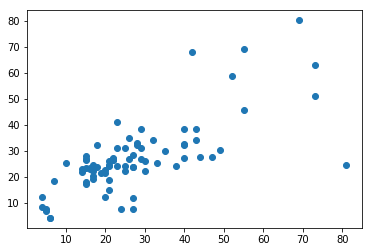

In [ ]:
plt.scatter(y_test.as_matrix(), clr.predict(X_test))

## Texte

On cherche à comparer une [LDA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html) avec [word2vec](https://radimrehurek.com/gensim/models/word2vec.html) et [kmeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) et les données qui sont sur [ensae_teaching_cs/src/ensae_teaching_cs/data/data_web/](https://github.com/sdpython/ensae_teaching_cs/tree/master/src/ensae_teaching_cs/data/data_web).

In [ ]:
from ensae_teaching_cs.data import twitter_zip
df = twitter_zip(as_df=True)
df.head(n=2).T

,0,1
index,776066992054861825,776067660979245056
nb_user_mentions,0,0
nb_extended_entities,0,0
nb_hashtags,1,1
geo,NaN,NaN
text_hashtags,", SiJétaisPrésident",", SiJétaisPrésident"
annee,2016,2016
delimit_mention,NaN,NaN
lang,fr,fr
id_str,7.76067e+17,7.76068e+17


### Des mots aux coordonnées - tf-idf

In [ ]:
keep = df.text.dropna().index

In [ ]:
dfnonan = df.iloc[keep, :]
dfnonan.shape

(5087, 20)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(dfnonan["text"])

In [ ]:
tfidf[:2, :]

<2x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

### LDA

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_topics=10, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [ ]:
lda.fit(tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_jobs=1, n_topics=10, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [ ]:
tf_feature_names = tfidf_vectorizer.get_feature_names()
tf_feature_names[100:103]

['avoir', 'bac', 'bah']

In [ ]:
lda.components_.shape

(10, 1000)

On obtient dix vecteurs qui représentent les dix vecteurs associés aux dix clusters. Chaque dimension relié au fait que le mot appartient ou non au cluster.

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [ ]:
print_top_words(lda, tf_feature_names, 10)

Topic #0:
gratuit mcdo supprimerai école soir kebab macdo kfc domicile cc
Topic #1:
macron co https de la est le il et hollande
Topic #2:
sijetaispresident je les de la et le des en pour
Topic #3:
notaires eu organiserais mets carte nouveaux journées installation cache créer
Topic #4:
sijetaispresident interdirais les je ballerines la serait serais bah de
Topic #5:
ministre de sijetaispresident la je premier mort et nommerais président
Topic #6:
cours le supprimerais jour sijetaispresident lundi samedi semaine je vendredi
Topic #7:
port interdirait démissionnerais promesses heure rendrai ballerine mes changement christineboutin
Topic #8:
seraient sijetaispresident gratuits aux les nos putain éducation nationale bonne
Topic #9:
bordel seront légaliserai putes gratuites pizza mot virerais vitesse dutreil



### Clustering

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10)
km.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
km.cluster_centers_.shape

(10, 1000)

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.cluster_centers_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [ ]:
print_top_words(km, tf_feature_names, 10)

Topic #0:
serait sijetaispresident la le merde ça de et on ce
Topic #1:
est macron le il de la pas hollande gauche qui
Topic #2:
des sijetaispresident je de les et en le la pour
Topic #3:
les sijetaispresident je et de tous pour ballerines seraient en
Topic #4:
vous seriez sijetaispresident je merde de pas la dans tous
Topic #5:
https co macron de la le les et via sijetaispresident
Topic #6:
je sijetaispresident le ferais serais pas un en que et
Topic #7:
ministre premier nommerais sijetaispresident de je la mickey serait 1er
Topic #8:
la de sijetaispresident je et france les en le république
Topic #9:
sijetaispresident de le un pour plus une en et aurait



Ah les stop words....